In [1]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset
df = pd.read_csv('tracks.csv')

# Select features and target variable
X = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
y = df['popularity']
X["response"] = y

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)
X_train.to_csv("train.csv", index = False)
X_test.to_csv("test.csv", index = False)


In [2]:
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 19.0.2+7-44, mixed mode, sharing)
  Starting server from C:\Users\KarlE\AppData\Local\Programs\Python\Python39\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\KarlE\AppData\Local\Temp\tmp__op49zb
  JVM stdout: C:\Users\KarlE\AppData\Local\Temp\tmp__op49zb\h2o_KarlE_started_from_python.out
  JVM stderr: C:\Users\KarlE\AppData\Local\Temp\tmp__op49zb\h2o_KarlE_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_KarlE_9d1mjx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.471 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [3]:
train = h2o.import_file("train.csv")
test = h2o.import_file("test.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
train.head()

acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,response
0.724,0.7,0.385,2.38e-06,0.0605,-13.987,0.031,90.241,0.675,21
0.486,0.637,0.839,0,0.184,-4.454,0.0344,87.555,0.809,26
0.616,0.634,0.586,0.000159,0.522,-9.597,0.04,123.288,0.864,47
0.0198,0.82,0.814,3.14e-06,0.175,-5.338,0.0397,140.017,0.935,36
2.4e-05,0.295,0.961,0.67,0.203,-4.605,0.0997,136.882,0.196,52
0.98,0.515,0.145,0.913,0.103,-18.226,0.0545,65.577,0.427,32
0.966,0.451,0.351,1.79e-06,0.309,-7.5,0.0295,76.072,0.636,4
0.0303,0.324,0.885,0,0.11,-4.884,0.0668,131.949,0.533,22
0.971,0.43,0.299,0.000257,0.103,-12.502,0.034,96.259,0.788,22
0.000148,0.19,0.952,3.39e-05,0.32,-6.57,0.059,180.912,0.533,39


In [5]:
x = train.columns
y = "response"
x.remove(y)

In [6]:
aml = H2OAutoML(max_models=20, seed=1, max_runtime_secs=900)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
11:10:53.577: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20230222_111053


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    75                 75                          1.07585e+06            0            15           11.48         1             2306          1136.63

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 195.5040292975608
RMSE: 13.982275540753758
MAE: 11.112855113032214
RMSLE: NaN
Mean Residual Deviance: 195.5040292975608

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 223.4970773235242
RMSE: 14.949818638482682
MAE: 11.884520230188837
RMSLE: NaN
Mean Residual Deviance: 223.4970773235242

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     11.8845   0.0236765   11.8667       11.9205       11.8962       11.8747       11.8645
mean_residual_deviance  223.497   0.740337    222.945       224.354       224.051       223.557       222.579
mse                     223.497   0.740337    222.945       224.354       224.051       223.557       222.579
r2                      0.339136  0.00259192  0.340974      0.33944       0.334704      0.341035      0.339527
residual_deviance       223.497   0.740337    222.945       224.354       224.051       223.557       222.579
rmse                    14.9498   0.0247626   14.9313       14.9784       14.9683       14.9518       14.9191
rmsle                   nan       0           nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------
    2023-02-22 11:13:26  2 min 16.316 sec  0                  18.3901          15.2878         338.195
    2023-02-22 11:13:28  2 min 18.569 sec  5                  16.4102          13.6149         269.296
    2023-02-22 11:13:30  2 min 20.582 sec  10                 15.4303          12.6857         238.096
    2023-02-22 11:13:32  2 min 22.549 sec  15                 14.9318          12.1615         222.958
    2023-02-22 11:13:34  2 min 24.452 sec  20                 14.6639          11.8484         215.03
    2023-02-22 11:13:36  2 min 26.328 sec  25                 14.4861          11.6401         209.848
    2023-02-22 11:13:38  2 min 28.105 sec  30                 14.3597          11.4953         206.2
    2023-02-22 11:13:39  2 min 29.859 sec  35                 14.2619          11.3872         203.402
    2023-02-22 11:13:41  2 min 31.564 sec  40                 14.1801          11.3033         201.075
    2023-02-22 11:13:43  2 min 33.235 sec  45                 14.1082          11.2318         199.042
    2023-02-22 11:13:44  2 min 34.970 sec  50                 14.0384          11.1662         197.078
    2023-02-22 11:13:46  2 min 36.486 sec  55                 13.9916          11.1224         195.764
    2023-02-22 11:13:47  2 min 37.225 sec  60                 13.9823          11.1129         195.504
    2023-02-22 11:13:47  2 min 37.380 sec  65                 13.9823          11.1129         195.504
    2023-02-22 11:13:47  2 min 37.531 sec  70                 13.9823          11.1129         195.504
    2023-02-22 11:13:47  2 min 37.686 sec  75                 13.9823          11.1129         195.504

Variable Importances: 
variable          relative_importance    scaled_importance    perce

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_1_AutoML_1_20230222_111053,13.9823,195.504,11.1129,nan,195.504,21404,0.012433,GBM
GLM_1_AutoML_1_20230222_111053,16.3326,266.754,13.2455,nan,266.754,788,0.000512,GLM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

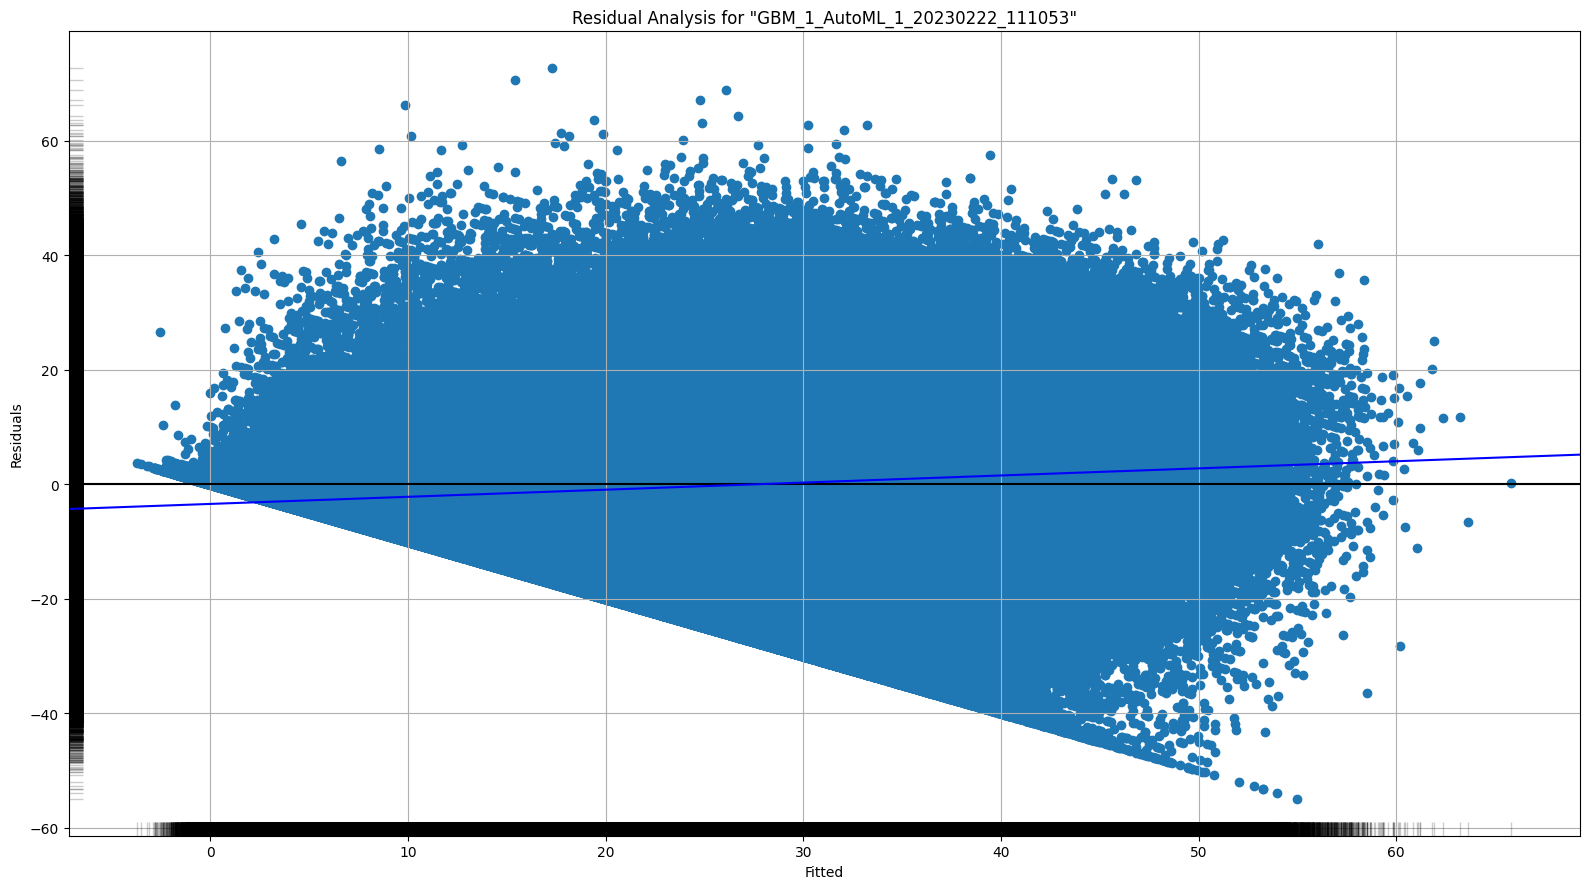

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

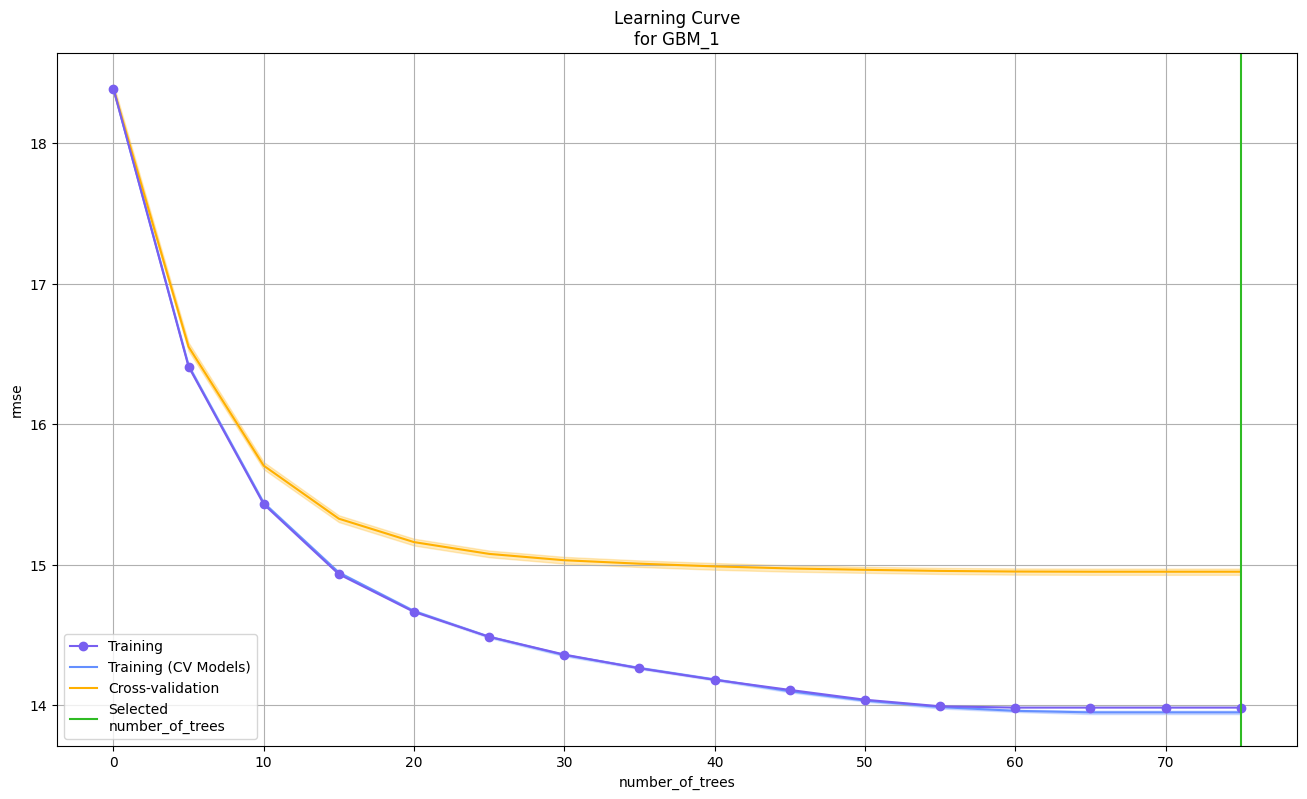

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

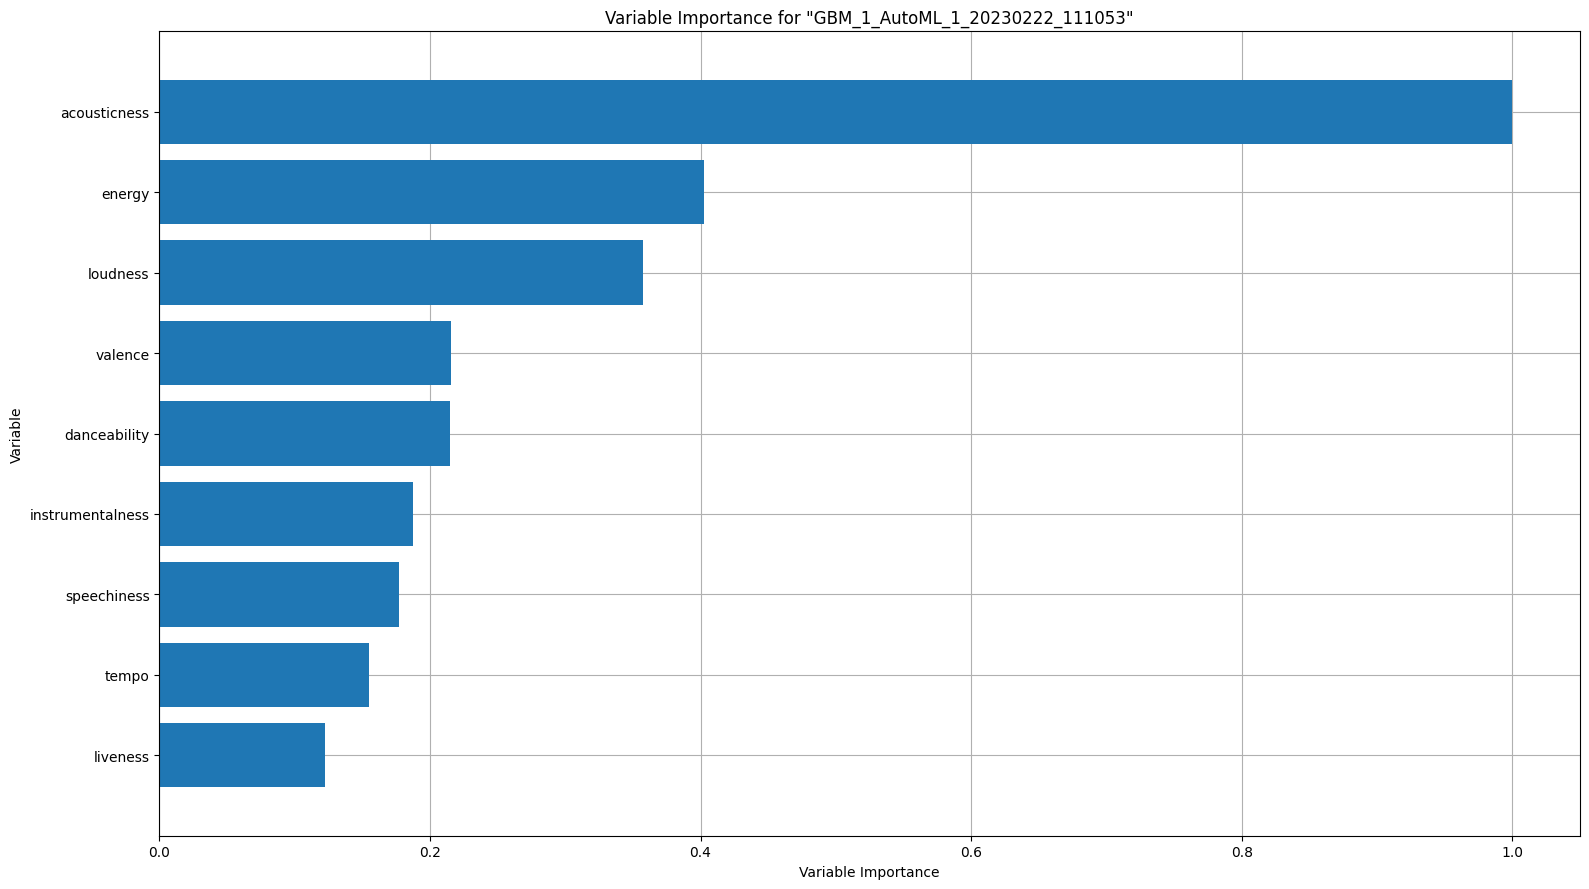

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

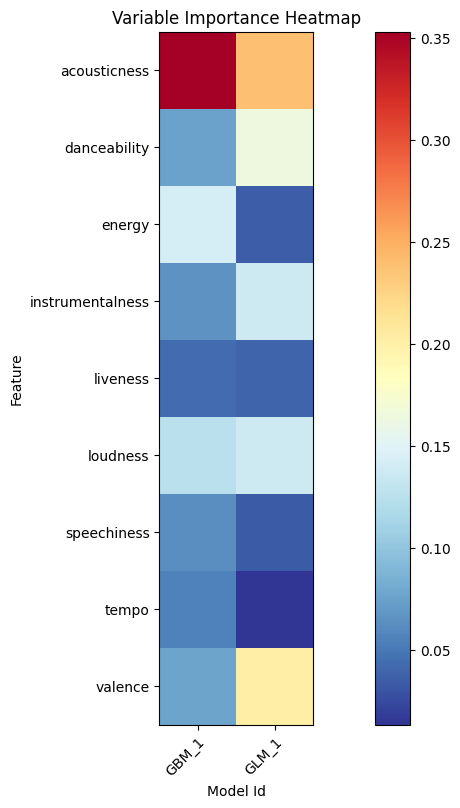

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

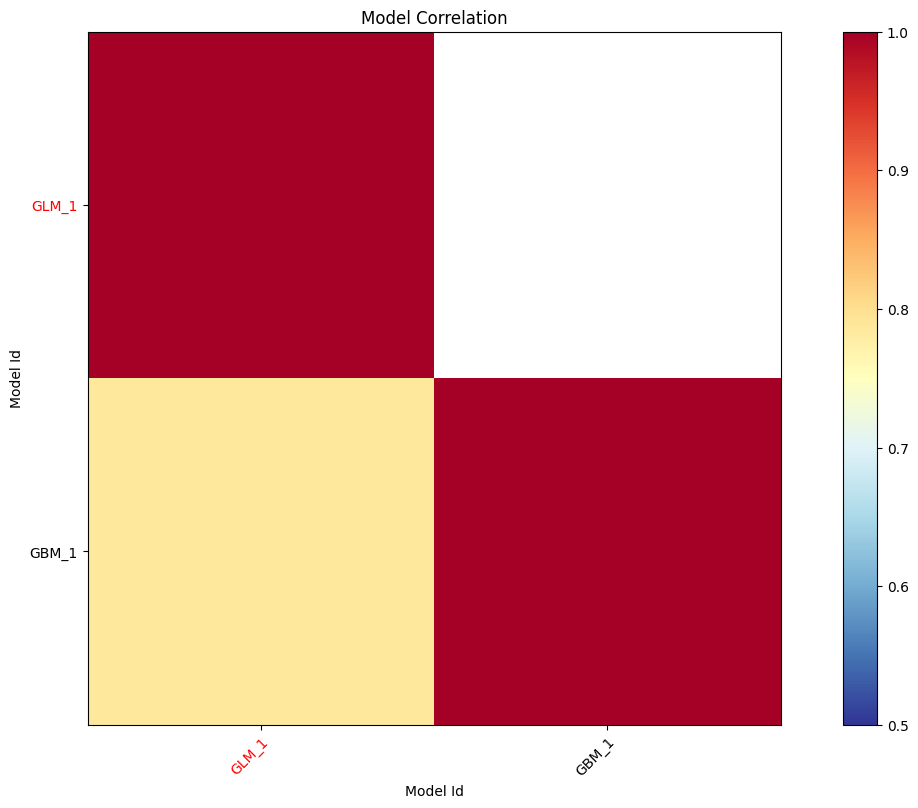

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

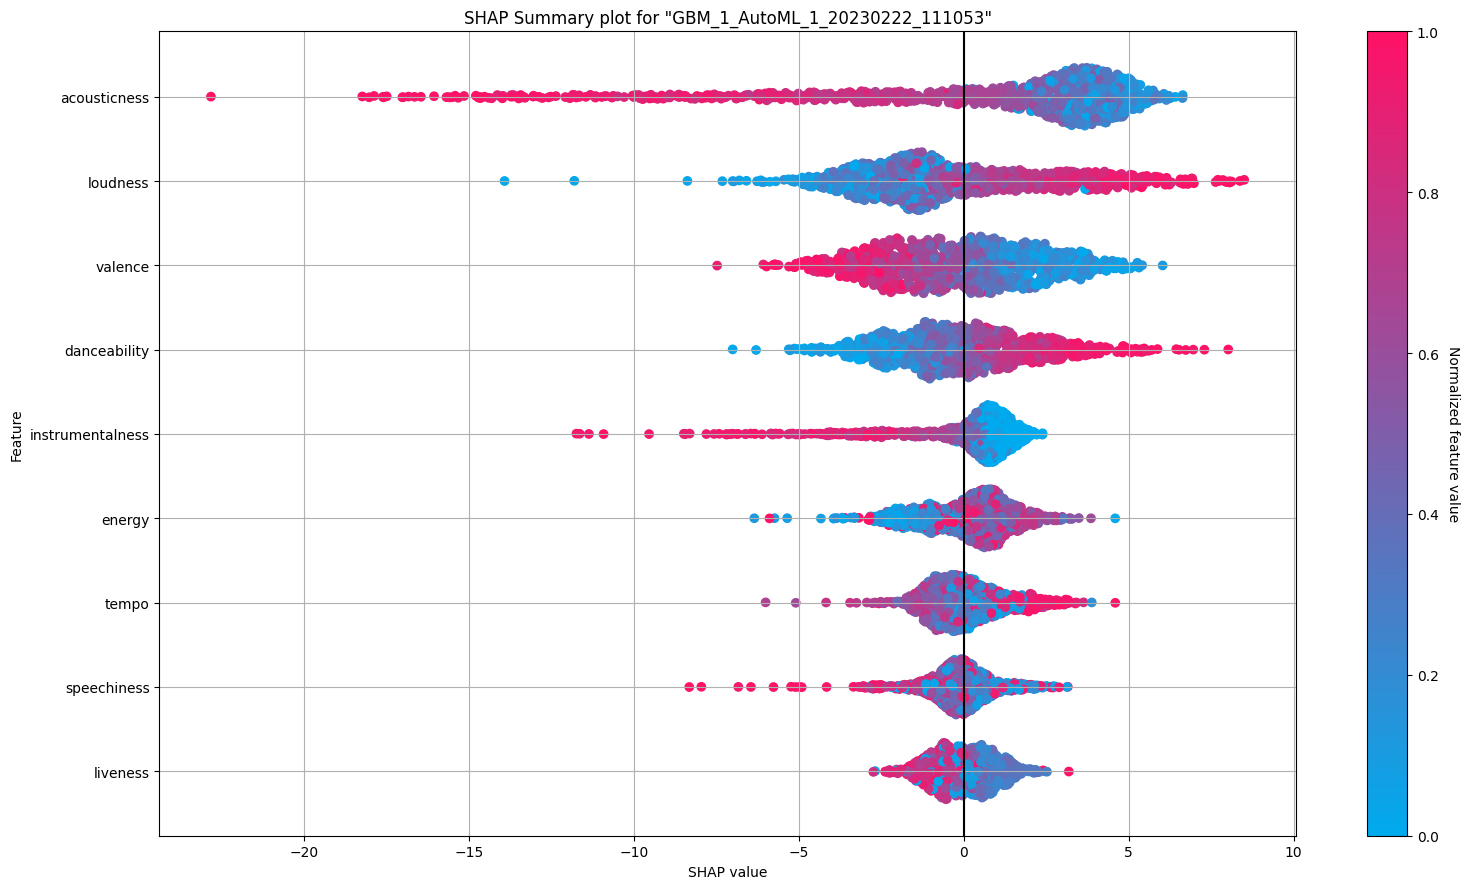

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

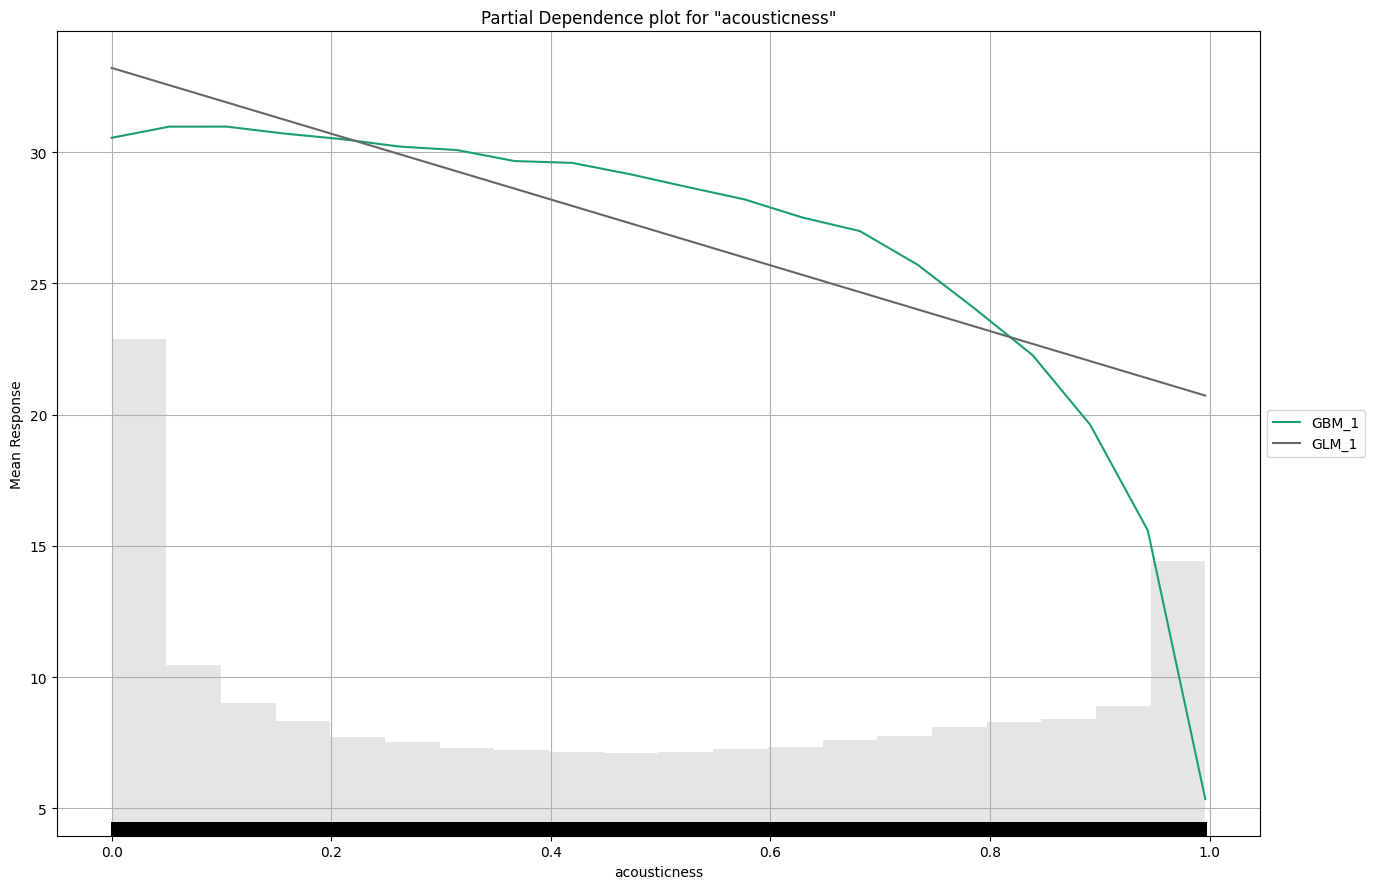

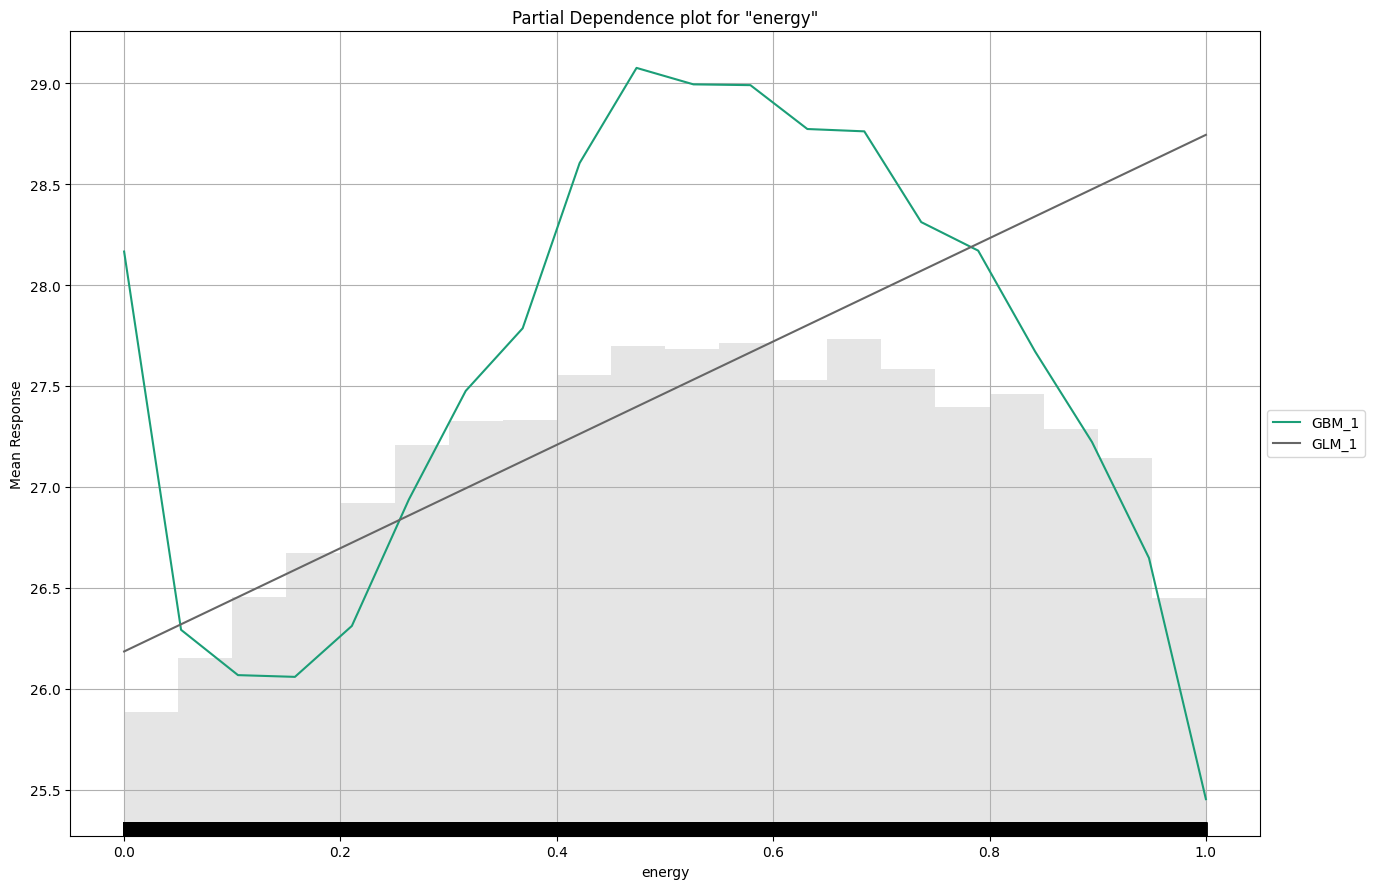

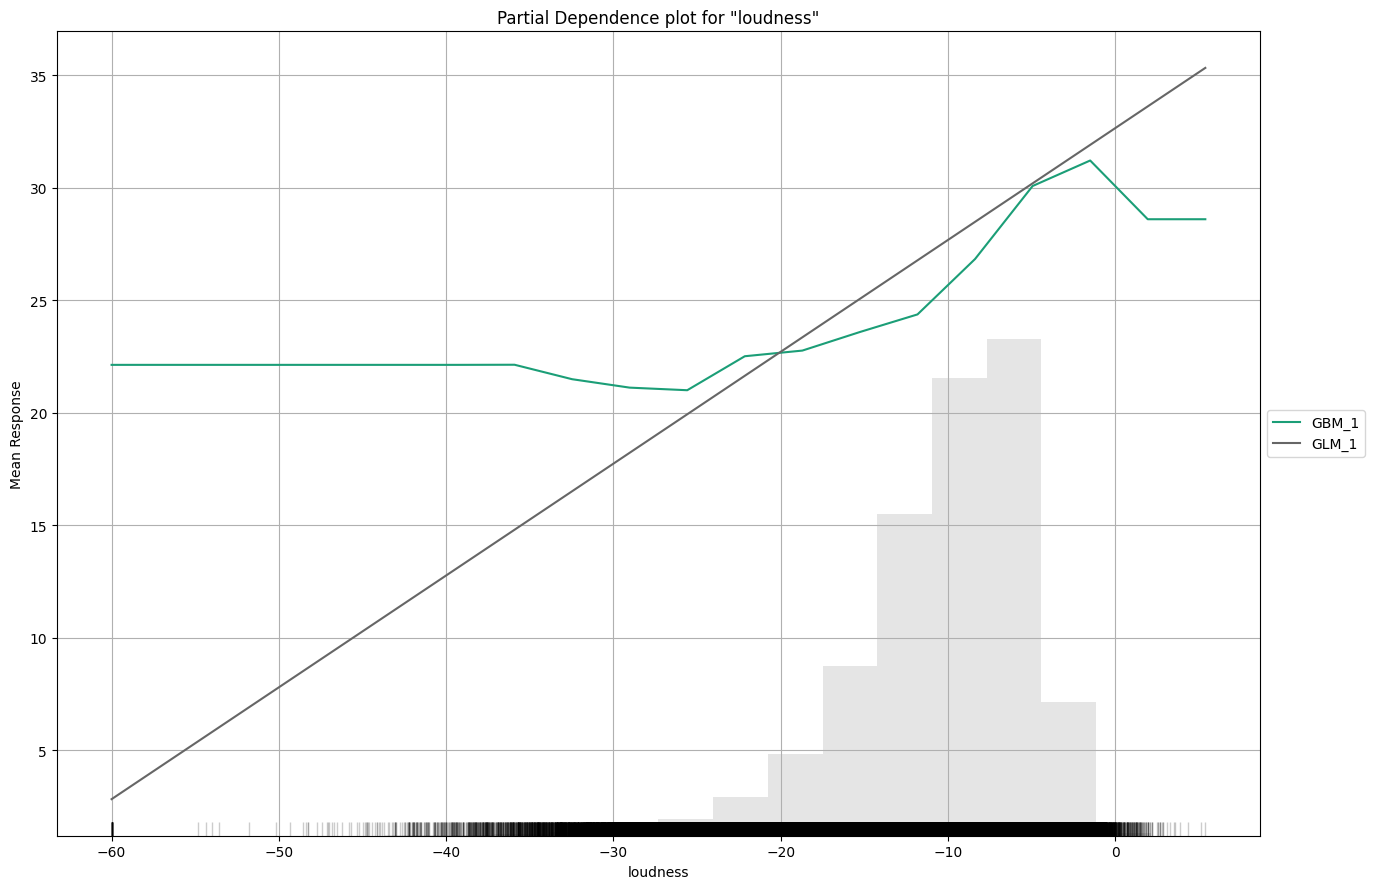

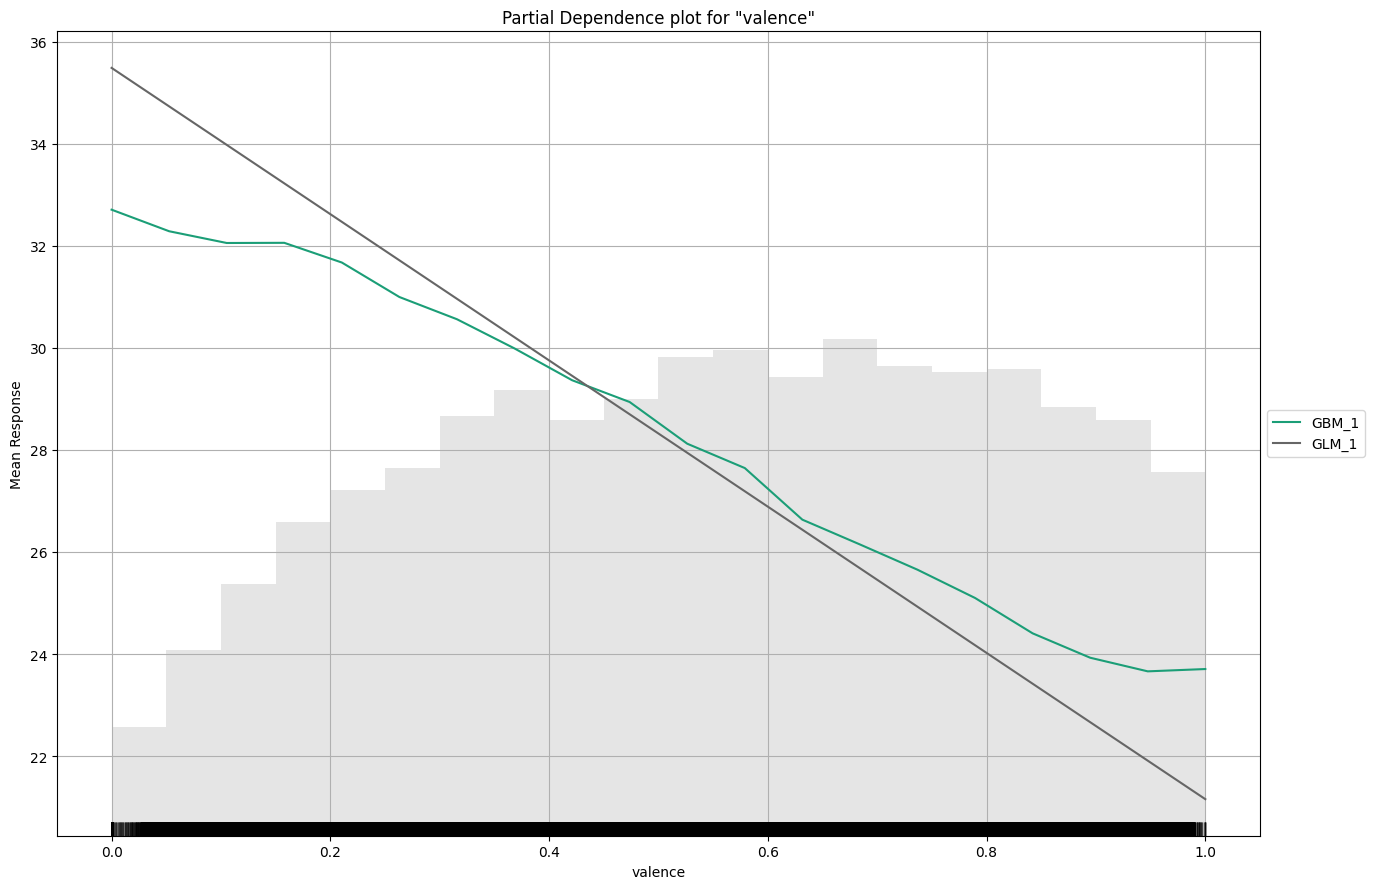

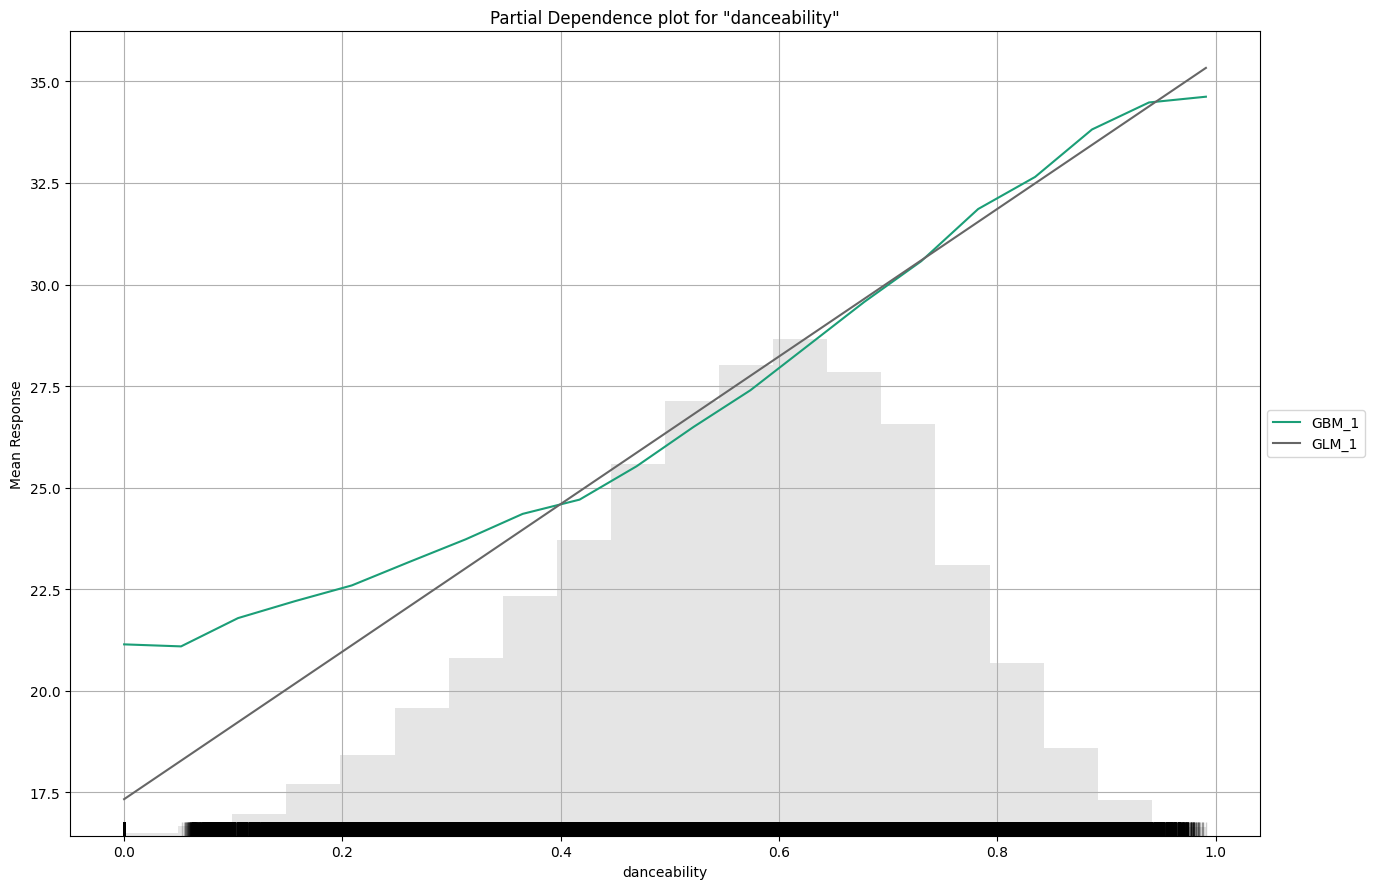

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [10]:
""" aml.explain(train) """
explanation = aml.explain(train)
explanation.show()

In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DRF_1_AutoML_2_20230222_102950,14.8547,220.663,11.8491,0.950333,220.663
GBM_1_AutoML_2_20230222_102950,14.9149,222.453,11.8933,nan,222.453
GBM_4_AutoML_2_20230222_102950,14.9375,223.13,11.9125,nan,223.13
GBM_3_AutoML_2_20230222_102950,14.9964,224.892,11.9766,nan,224.892
GBM_2_AutoML_2_20230222_102950,15.0346,226.039,12.019,nan,226.039
XRT_1_AutoML_2_20230222_102950,15.6049,243.513,12.3454,0.966889,243.513
GLM_1_AutoML_2_20230222_102950,16.3079,265.949,13.2398,nan,265.949
